In [2]:
from src.agent import AgentPPT
from src.openai import generate_image, query
from src.ppt_reader import get_shape_content
from src.utils import fromEmus, ppt_to_pdf, pdf_to_img, toEmus
from pptx import Presentation
import src.prompts as prompts
import json, os, tempfile, shutil


In [2]:
agent = AgentPPT()
response = ""
response += agent.action_module("Change the title to 'Raccoons', and set the font color to green", slide_idx=0)
response += agent.action_module("Change the background to pink. Add a picture of a basketball to the bottom right", slide_idx=0)
response += agent.action_module("Change the content to 'I love fish'. Insert a 3x2 table on tesla annd google stock prices.", slide_idx=0)
response += agent.action_module("Delete the image of the basketball. Insert a new image of a fish to the top left of the slide.", slide_idx=0)
response += agent.action_module("Add on to the content on why fish is good for you.", slide_idx=0)
response += agent.action_module("Add a table describing the stock prices of apple, tesla, and google. Move it to the center of the slide.", slide_idx=0)
agent.save_ppt()

In [3]:
agent = AgentPPT()
response = agent.action_module("Add a table describing the stock prices of apple, tesla, and google. Make it cover the whole slide", slide_idx=0)
agent.save_ppt()

In [4]:
print(response)

API - insert_shape | Status - SUCCESS | Shape inserted: TABLE | Shape modified: {"table_data": ["Company", "Stock Price", "Date", "Apple", "N/A", "N/A", "Tesla", "N/A", "N/A", "Google", "N/A", "N/A"], "width": 254, "height": 190, "top": 0, "left": 0} | Prompt - {'shape_type': 'TABLE', 'instructions': "Insert a table covering the entire slide (width: 254.0, height: 190.5) to describe the stock prices of Apple, Tesla, and Google. The table should have columns for 'Company', 'Stock Price', and 'Date'. Position the table at left: 0, top: 0."}



Conversion completed: 1 files converted successfully, 0 files failed.


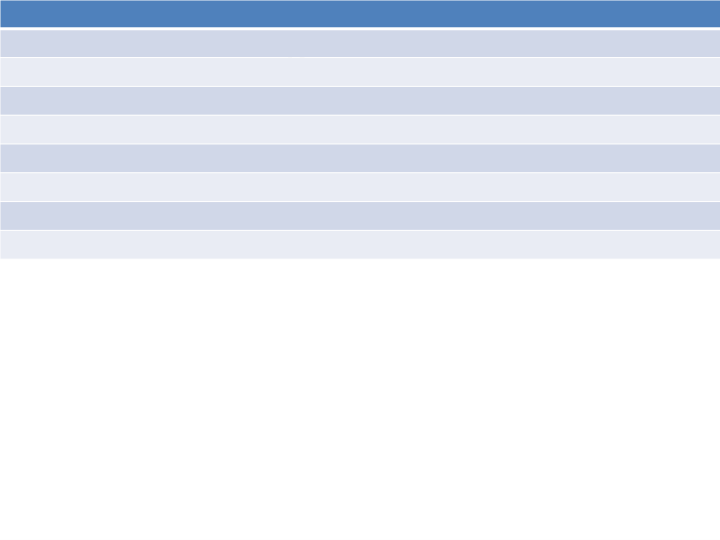

In [19]:
ppt = Presentation()
slide_layout = ppt.slide_layouts[1]
slide = ppt.slides.add_slide(slide_layout)
shape = slide.shapes[0]
shape.text = "Raccoon"
shape = slide.shapes.add_table(9, 2, 0, 0, toEmus(2*40), toEmus(3*12))
shape.table.columns[0].width = toEmus(500)
temp_dir = tempfile.mkdtemp()

temp_ppt_path = os.path.join(temp_dir, "temp_presentation.pptx")
ppt.save(temp_ppt_path)
pdf_path = ppt_to_pdf(temp_ppt_path, temp_dir)
imgs = slide_images = pdf_to_img(pdf_path)

shutil.rmtree(temp_dir)

imgs[0]

In [20]:
len(shape.)